<a href="https://colab.research.google.com/github/Zoeyyy14/C115/blob/main/C115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving C115.csv to C115.csv


In [ ]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("C115.csv")
score=df["Score"].tolist()
accepted=df["Accepted"].tolist()
fig=px.scatter(x=score, y=accepted)
fig.show()

In [ ]:
import numpy as np
score_array=np.array(score)
accepted_array=np.array(accepted)
m,c=np.polyfit(score_array,accepted_array,1)
y=[]
for x in score_array:
  y_value=m*x+c
  y.append(y_value)
fig=px.scatter(x=score_array,y=accepted_array)
fig.update_layout(shapes=[ 
                          dict(
                              type="line",
                               x0=min(score_array),
                               x1=max(score_array),
                               y0=min(y),
                               y1=max(y)
                          )
])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



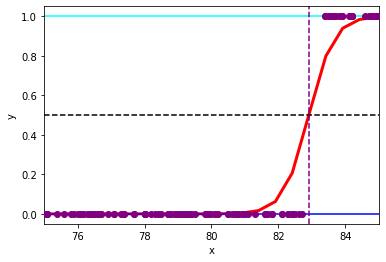

In [ ]:
#Sigmoid
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X=np.reshape(score,(len(score),1))
Y=np.reshape(accepted,(len(score),1))
lr=LogisticRegression()
lr.fit(X,Y)

plt.figure()
plt.scatter(X.ravel(),Y,color="purple",zorder=20)
def model(x):
  return 1/(1+np.exp(-x))
X_test=np.linspace(0,100,200)
chances=model(X_test*lr.coef_+lr.intercept_).ravel()

plt.plot(X_test,chances,color="red",linewidth=3)
plt.axhline(y=0,color="blue",linestyle="-")
plt.axhline(y=1,color="cyan",linestyle="-")
plt.axhline(y=0.5,color="black",linestyle="--")
plt.axvline(x=X_test[165],color="purple",linestyle="--")
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(75,85)
plt.show()

In [ ]:
user_score=float(input("Enter Your Marks Here"))
chances=model(user_score*lr.coef_+lr.intercept_).ravel()[0]
if chances<0.01:
  print("The Student Will Not Get Accepted")
elif chances>=1:
  print("The Student Will Get Accepted")
elif chances<0.5:
  print("The Student Might Not Get Accepted")
else:
  print("The Student May Get Accepted")

Enter Your Marks Here75
The Student Will Not Get Accepted
